# NEWTON-RAPHSON METHOD

## Explation
- The Newton-Raphson Method is a simple algorithm to find an approximate solution for the root of a real-valued function f(x) = 0. If the function f satisfies sufficient assumptions then after repeative 'max_iteration' steps.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sympy import *

In [2]:
# Graph 2d f(x) within range [i, N)
def graph(f, x_range):
    x = np.array(x_range)
    y = eval(str(f))
    plt.plot(x, y, marker='.')
    # plt.scatter(0,0) # Plot point
    plt.show()
    
    
# Newton-Raphson Method with DEFINED number of iterations 'max iteration'.
def newton_raphson(xn, max_iteration):
    for i in max_iteration:
        xn = xn - f.evalf(subs={x:xn}) / f1.evalf(subs={x:xn})
    return xn


# Get closest coordinate (x,y) with input xn when f(xn) = 0.
def closest_coor_equals_zero(f, x, xn):
    # Solve the equations when f(xn) = 0.
    tmpFiniteSet = solveset(Eq(f, 0), x, domain=S.Reals)
    solutionsX = list(tmpFiniteSet.evalf(subs={x:xn}))
    # Get np vector coordinate for input xn
    yn = float(f.evalf(subs={x:xn}))
    inputCoor = np.array([xn, yn])
    
    minCoor = None
    minDist = 2147483647
    
    # Find the smallest distance for each output solutions respect to xn input.
    for i in range(0, len(solutionsX)):
        tmpX = float(solutionsX[i])
        tmpCoor = np.array([tmpX,0])
        tmpDist = np.linalg.norm(tmpCoor - inputCoor)
        
        if tmpDist < minDist:
            minDist = tmpDist
            minCoor = tmpCoor
    
    return minCoor

In [3]:
# Define variable 'x'
x = symbols('x', real=True, nonzero=True)
# Define function f(x)
f = x**3 - 2*x + 2
# Define the number of loop and default x value.
max_iteration = 5 # CHANGE THIS VALUE.
DEFAULT_VALUE = -7.5 # CHANGE THIS VALUE.

In [4]:
# Find the first derivative using Sympy library
f1 = f.diff(x)

In [5]:
print(f'f(x) = {f}')
print(f'f`(x) = {f1}')

f(x) = x**3 - 2*x + 2
f`(x) = 3*x**2 - 2


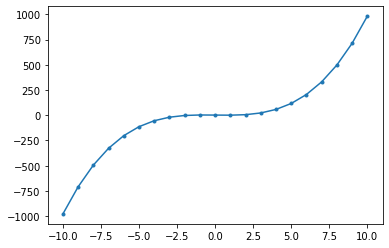

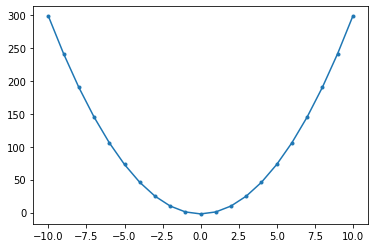

In [6]:
# Basic graphs of f(x) and f`(x)
graph(f, range(-10,11))
graph(f1, range(-10,11))

In [7]:
# Start with xn = DEFAULT_VALUE
xn = DEFAULT_VALUE
# Apply Newton-Raphson Method
xn = newton_raphson(xn, range(0, max_iteration))

In [8]:
print(f'INPUT: {DEFAULT_VALUE} -> OUTPUT: {xn}')

INPUT: -7.5 -> OUTPUT: -1.79908858225565


## More visualizations
- Plot to see how each step changes the coordinate.

In [9]:
# Graph of movements
# Graph 2d f(x) within range [i, N)
def graph2(f, xvar, xn, x_range, max_iteration):
    x = np.array(x_range)
    y = eval(str(f))
    plt.plot(x, y)
    expectedCoor = closest_coor_equals_zero(f, xvar, xn)
    yn = float(f.evalf(subs={xvar:xn}))
    plt.scatter(xn, yn, c='yellow')
    
    # Apply Newton-Raphson
    for i in max_iteration:
        xn = xn - f.evalf(subs={xvar:xn}) / f1.evalf(subs={xvar:xn})
        yn = float(f.evalf(subs={xvar:xn}))
        plt.scatter(xn, yn, c='yellow')
    plt.scatter(expectedCoor[0], expectedCoor[1], c='red') # Plot expected point
    plt.show()
    return xn

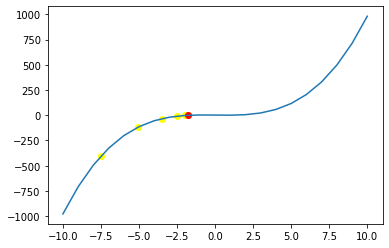

INPUT: -7.5 -> OUTPUT: -1.79908858225565


In [10]:
xn = graph2(f, x, DEFAULT_VALUE, range(-10,11), range(0,max_iteration))
print(f'INPUT: {DEFAULT_VALUE} -> OUTPUT: {xn}')